# Analysis of Crime Data for Chicago

In this project, I analyze the crime data of Chicago and show how different types of crimes are distributed among the different community areas. In total there are 77 community areas in Chicago.

I start by importing the tools needed for this project.

In [92]:
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt
import contextily as ctx

The datasets are downloaded from the Chicago Data portal and can be found at [Crimes - 2001 to Present
](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data) and [Boundaries - Community Areas (current)](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6).

In [93]:
#Read the datasets using pandas read_csv function
cri_data = pd.read_csv('/Users/zamiulalam/Documents/Data_Science/datasets/Chicago_Crimes/Crimes_-_2001_to_Present_20250301.csv')
com_data = pd.read_csv('/Users/zamiulalam/Documents/Data_Science/datasets/Chicago_Crimes/CommAreas_20250315.csv')

It is seen that the crime dataset has 22 columns and 7,262,334 rows. We look at the first five rows using the head() function.

In [94]:
print('Shape of crime dataframe = ',cri_data.shape)
cri_data.head()

Shape of crime dataframe =  (8264669, 22)


ID Case Number                    Date                    Block  \
0  13311263    JG503434  07/29/2022 03:39:00 AM          023XX S TROY ST   
1  13053066    JG103252  01/03/2023 04:44:00 PM  039XX W WASHINGTON BLVD   
2  11227634    JB147599  08/26/2017 10:00:00 AM      001XX W RANDOLPH ST   
3  13203321    JG415333  09/06/2023 05:00:00 PM         002XX N Wells st   
4  13204489    JG416325  09/06/2023 11:00:00 AM           0000X E 8TH ST   

   IUCR                Primary Type                    Description  \
0  1582  OFFENSE INVOLVING CHILDREN              CHILD PORNOGRAPHY   
1  2017                   NARCOTICS  MANUFACTURE / DELIVER - CRACK   
2  0281         CRIM SEXUAL ASSAULT                 NON-AGGRAVATED   
3  1320             CRIMINAL DAMAGE                     TO VEHICLE   
4  0810                       THEFT                      OVER $500   

                     Location Description  Arrest  Domestic  ...  Ward  \
0                               RESIDENCE    True     False  ...  25.0   
1                                SIDEWALK    True     False  ...  28.0   
2                             HOTEL/MOTEL   False     False  ...  42.0   
3  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...  42.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...   4.0   

   Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0            30.0        17           NaN          NaN  2022   
1            26.0        18           NaN          NaN  2023   
2            32.0        02           NaN          NaN  2017   
3            32.0        14     1174694.0    1901831.0  2023   
4            32.0        06     1176857.0    1896680.0  2023   

               Updated On   Latitude  Longitude                       Location  
0  04/18/2024 03:40:59 PM        NaN        NaN                            NaN  
1  01/20/2024 03:41:12 PM        NaN        NaN                            NaN  
2  02/11/2018 03:57:41 PM        NaN        NaN                            NaN  
3  11/04/2023 03:40:18 PM  41.886018 -87.633938  (41.886018055, -87.633937881)  
4  11/04/2023 03:40:18 PM  41.871835 -87.626151   (41.871834768, -87.62615082)  

[5 rows x 22 columns]

I then find out how many missing values the dataset has and express it as a percentage of the tolal data.

In [95]:
#Find the number of missing values in each column
missing_values = cri_data.isnull().sum()

#Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(cri_data)) * 100

#Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})

missing_data.sort_values(by='Percentage (%)', ascending=False)

Missing Values  Percentage (%)
Ward                          614827        7.439221
Community Area                613453        7.422596
Location                       91531        1.107497
Longitude                      91531        1.107497
Latitude                       91531        1.107497
Y Coordinate                   91531        1.107497
X Coordinate                   91531        1.107497
Location Description           14008        0.169493
District                          47        0.000569
Domestic                           0        0.000000
Beat                               0        0.000000
Case Number                        0        0.000000
Arrest                             0        0.000000
Description                        0        0.000000
FBI Code                           0        0.000000
Primary Type                       0        0.000000
IUCR                               0        0.000000
Year                               0        0.000000
Updated On                         0        0.000000
Block                              0        0.000000
Date                               0        0.000000
ID                                 0        0.000000

It is seen that the columns "Ward" and "Community Area" has the highest number of values missing. I try to dig in deeper by seeing if the missing values are from certain years in the dataset.

In [96]:
#Find the number of missing values per year
missing_values_per_year = cri_data.isnull().groupby(cri_data["Year"]).sum()
missing_values_per_year.head()

ID  Case Number  Date  Block  IUCR  Primary Type  Description  \
Year                                                                  
2001   0            0     0      0     0             0            0   
2002   0            0     0      0     0             0            0   
2003   0            0     0      0     0             0            0   
2004   0            0     0      0     0             0            0   
2005   0            0     0      0     0             0            0   

      Location Description  Arrest  Domestic  ...    Ward  Community Area  \
Year                                          ...                           
2001                     5       0         0  ...  481576          479597   
2002                     6       0         0  ...  133091          132618   
2003                     5       0         0  ...      20              48   
2004                    18       0         0  ...      25              67   
2005                    20       0         0  ...       1              54   

      FBI Code  X Coordinate  Y Coordinate  Year  Updated On  Latitude  \
Year                                                                     
2001         0          3052          3052     0           0      3052   
2002         0         15297         15297     0           0     15297   
2003         0          3949          3949     0           0      3949   
2004         0          2220          2220     0           0      2220   
2005         0          3849          3849     0           0      3849   

      Longitude  Location  
Year                       
2001       3052      3052  
2002      15297     15297  
2003       3949      3949  
2004       2220      2220  
2005       3849      3849  

[5 rows x 22 columns]

It turns out that most of the missing values in the data is from years 2001 and 2002. But the missing data is for mostly for "Community Area" only. So for the first few steps, I can work with the data without needing to worry about them. But, in the later steps, the column, "Community Area" is vital. So I will leave out the data from 2001 and 2002. I start by plotting a simple bar chart to see the top 10 types of crimes.

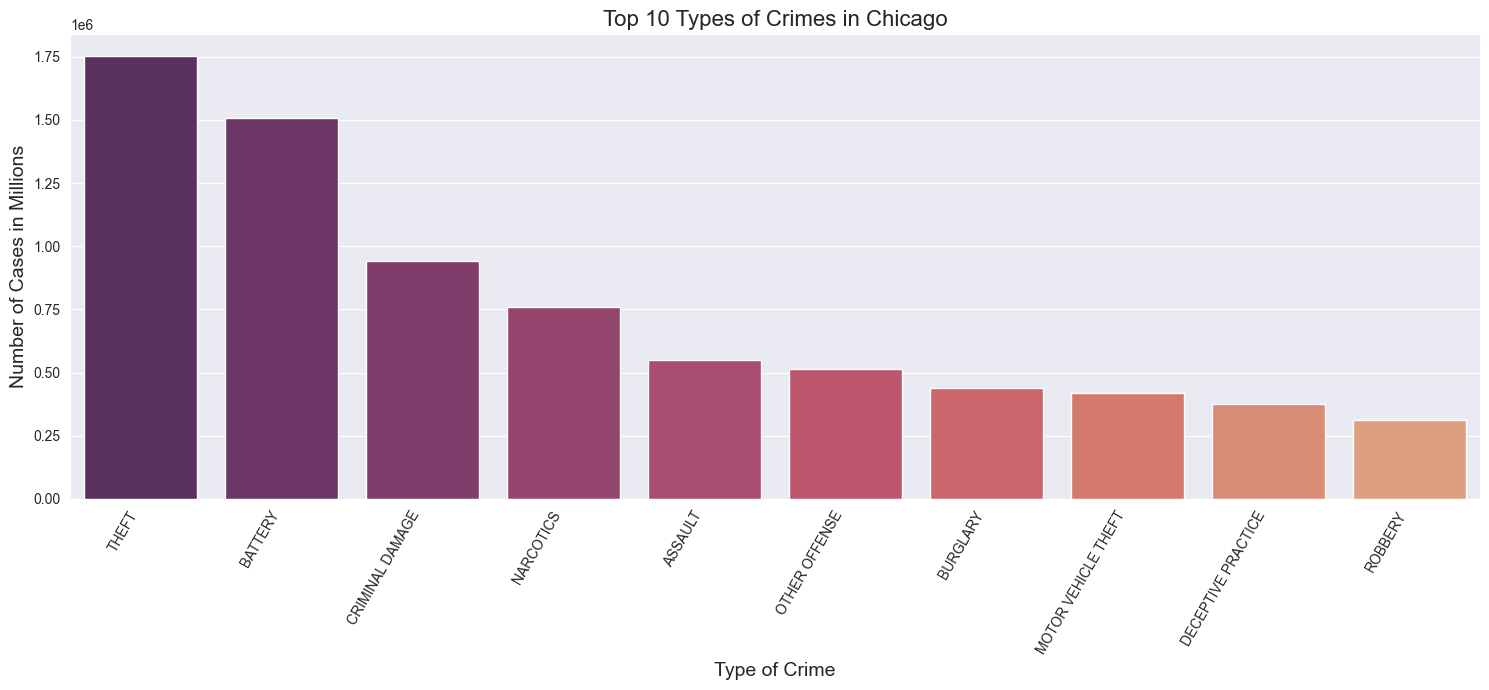

In [97]:
#Plot a Bar Chart
top_factors = cri_data['Primary Type'].value_counts().head(10)

plt.figure(figsize=(15, 7))
sns.set_style("darkgrid")

sns.barplot(x=top_factors.index, y=top_factors.values, hue= top_factors.index, palette="flare_r", legend=False)
plt.title('Top 10 Types of Crimes in Chicago', fontsize=16)
plt.xlabel('Type of Crime', fontsize=14)
plt.ylabel('Number of Cases in Millions', fontsize=14)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Next, I plot a pie chart to see what type of crimes are most common. It is seen that "THEFT" and "BATTERY" have the biggest chunks in the piechart. So they are the most common types.

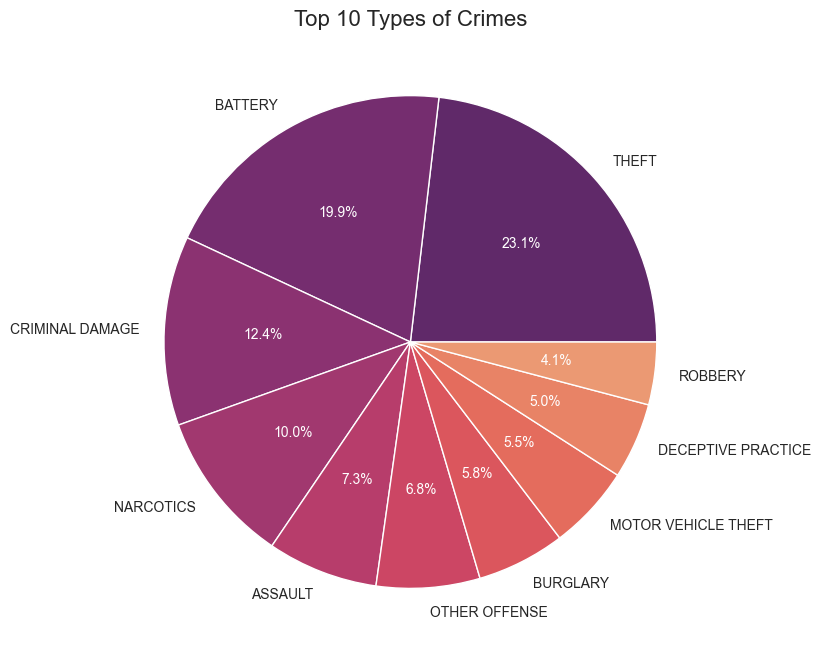

In [98]:
#Plot a Pie Chart
plt.figure(figsize=(8, 8))

patches, texts, autotexts = plt.pie(top_factors.values, labels=top_factors.index, autopct='%1.1f%%', colors=sns.color_palette("flare_r",10), center=(0, 0))

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Top 10 Types of Crimes', fontsize=16)
plt.show()

Next, I convert the "Date" column to pandas date_time format and make a barplot of the total number of crimes per year. I modify the dataframe slightly to exclude the data from 2025 as it only has data for the first two months.

In [99]:
#Convert 'Date' to datetime format
cri_data['Date'] = pd.to_datetime(cri_data['Date'])

#Exclude 2025 as yearly data is incomplete for 2025
cri_data = cri_data[~((cri_data['Date'].dt.year == 2025))]

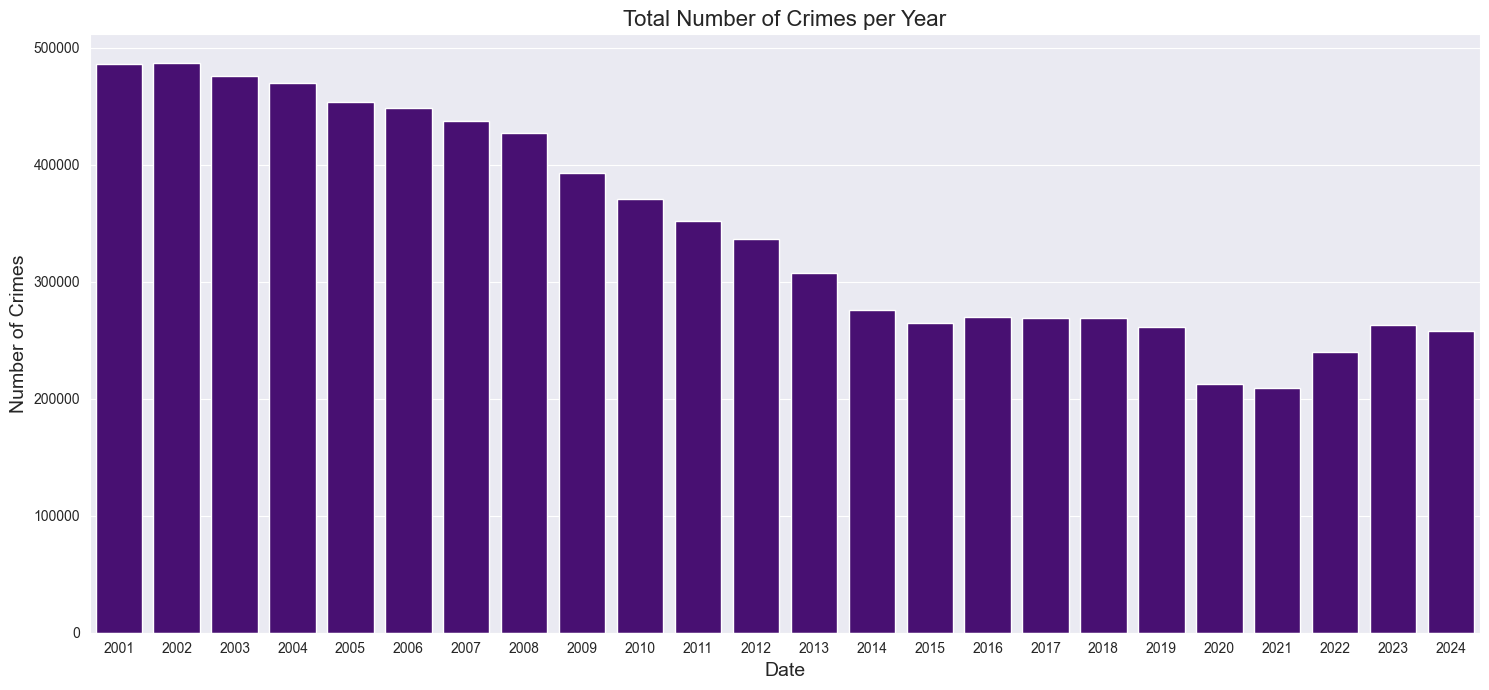

In [100]:
#Group by year to get the number of crimes per year
yearly_crimes = cri_data.groupby(cri_data['Date'].dt.to_period("Y")).size().reset_index()  
    
#Rename the columns       
yearly_crimes.columns = ['Year', 'Number of Crimes']

#Plotting total number of crimes per year
plt.figure(figsize=(15, 7))
sns.barplot(data = yearly_crimes, x='Year', y='Number of Crimes',color = 'indigo')
plt.title('Total Number of Crimes per Year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.tight_layout()
plt.show()

I see if there are any trends in the data by grouping the data by months and plotting the number of crimes each month from 2001 to 2024.

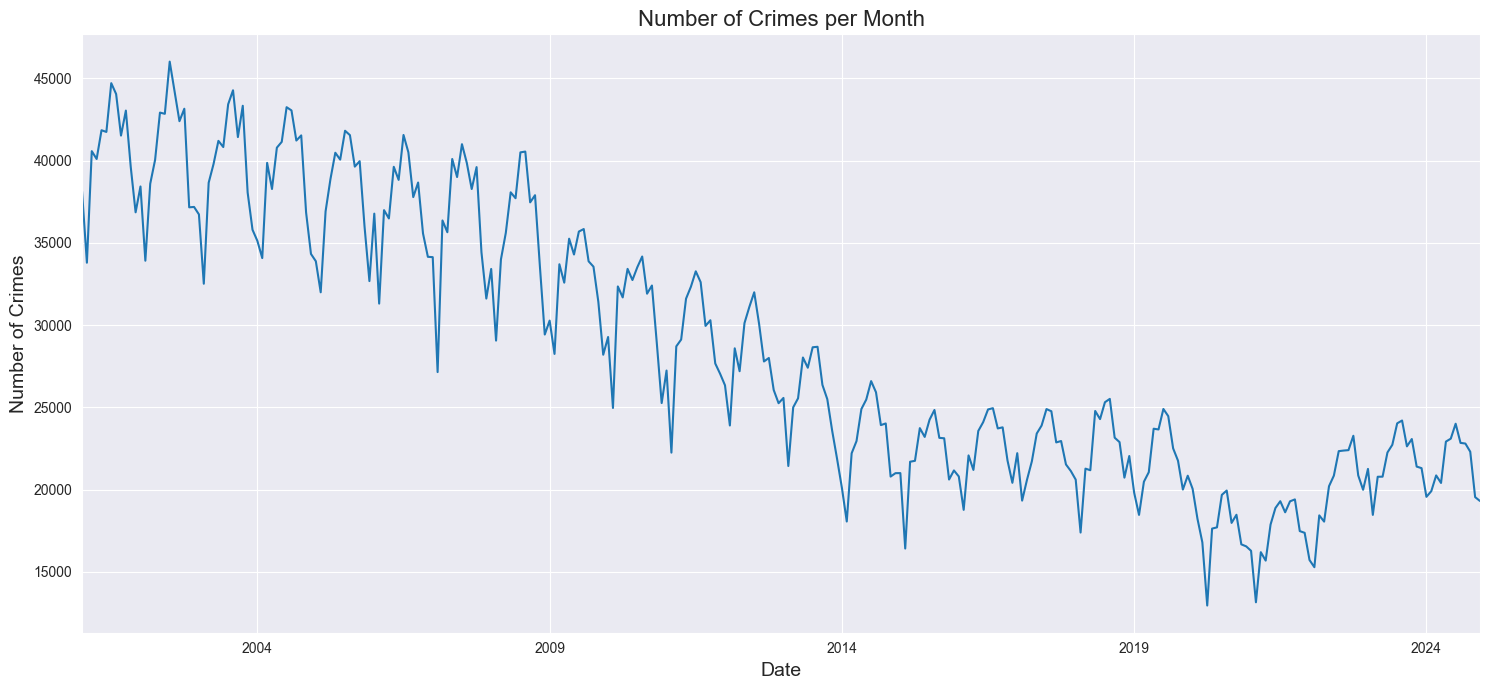

In [101]:
# Group by month and year to get the number of crimes per month
monthly_crimes = cri_data.groupby(cri_data['Date'].dt.to_period("M")).size()


# Plotting the daily crimes over time
plt.figure(figsize=(15, 7))
monthly_crimes.plot()
plt.title('Number of Crimes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.tight_layout()
plt.show()

There seems to be a trend where the the number of crimes is highest in the middle of the year. It makes sense as that is during the summer and with higher temperatures, there will be more people outside.

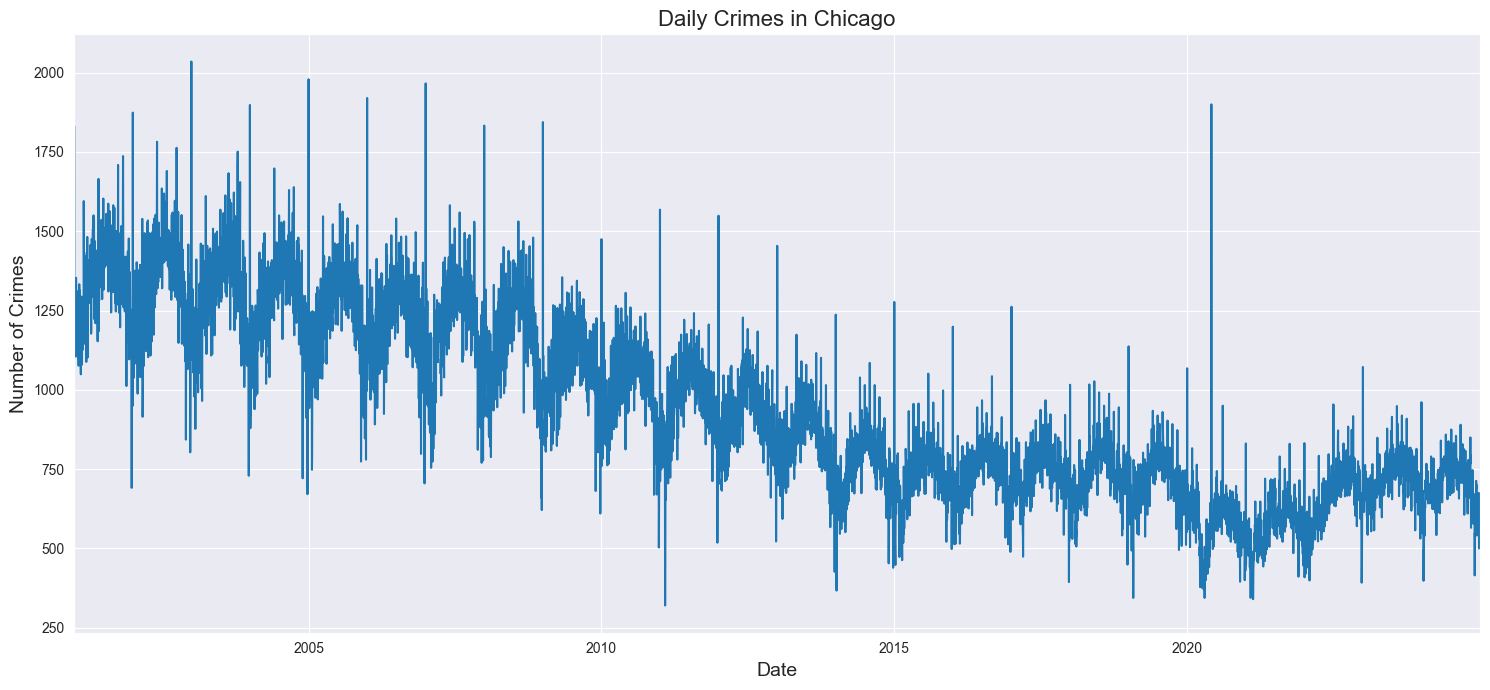

In [102]:
# Group the date by day
daily_crimes = cri_data.groupby(cri_data['Date'].dt.to_period("D")).size()

plt.figure(figsize=(15, 7))
daily_crimes.plot()

# Plot the daily crimes time series
plt.title('Daily Crimes in Chicago', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.tight_layout()
plt.show()

There are some unusual spikes at the beginning of each year. My guess is that some crime data inputs with missing dates were assigned the first day of the year. Lets remove the first day of the years for the trend analysis.

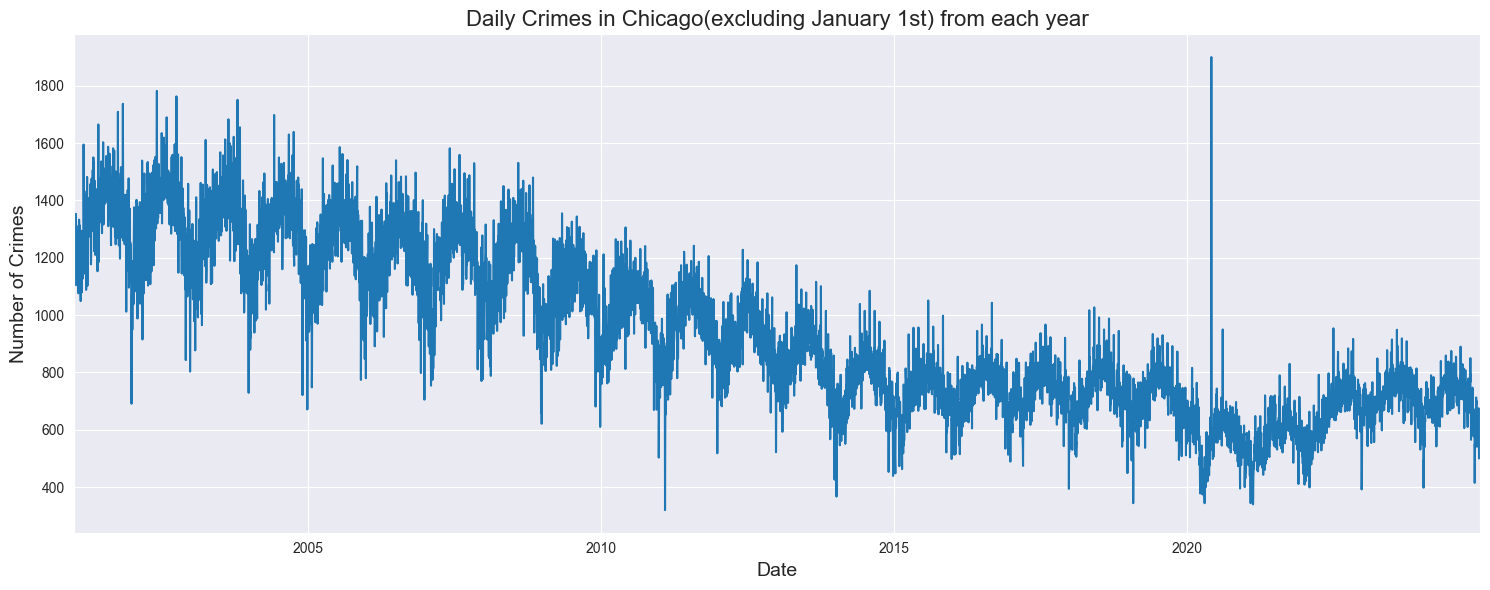

In [103]:
#Exclude the first day of the year for each year
cri_data_excl = cri_data[~((cri_data['Date'].dt.month == 1) & (cri_data['Date'].dt.day == 1))]
daily_crimes_excl = cri_data_excl.groupby(cri_data_excl['Date'].dt.to_period("D")).size()

# Plot the daily crimes time series
plt.figure(figsize=(15, 6))
daily_crimes_excl.plot()
plt.title('Daily Crimes in Chicago(excluding January 1st) from each year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.tight_layout()
plt.show()


The plot looks better now. There seems to be one last spike which seems unusual. Let's see which date it corresponds to and then remove it.

In [104]:
# Find the date with the highest number of crimes
max_crimes_date = daily_crimes_excl.idxmax()
max_crimes_count = daily_crimes_excl.max()

print(f"The date with the unusual spike in number of crimes is {max_crimes_date} with {max_crimes_count} crimes.")

The date with the unusual spike in number of crimes is 2020-05-31 with 1900 crimes.


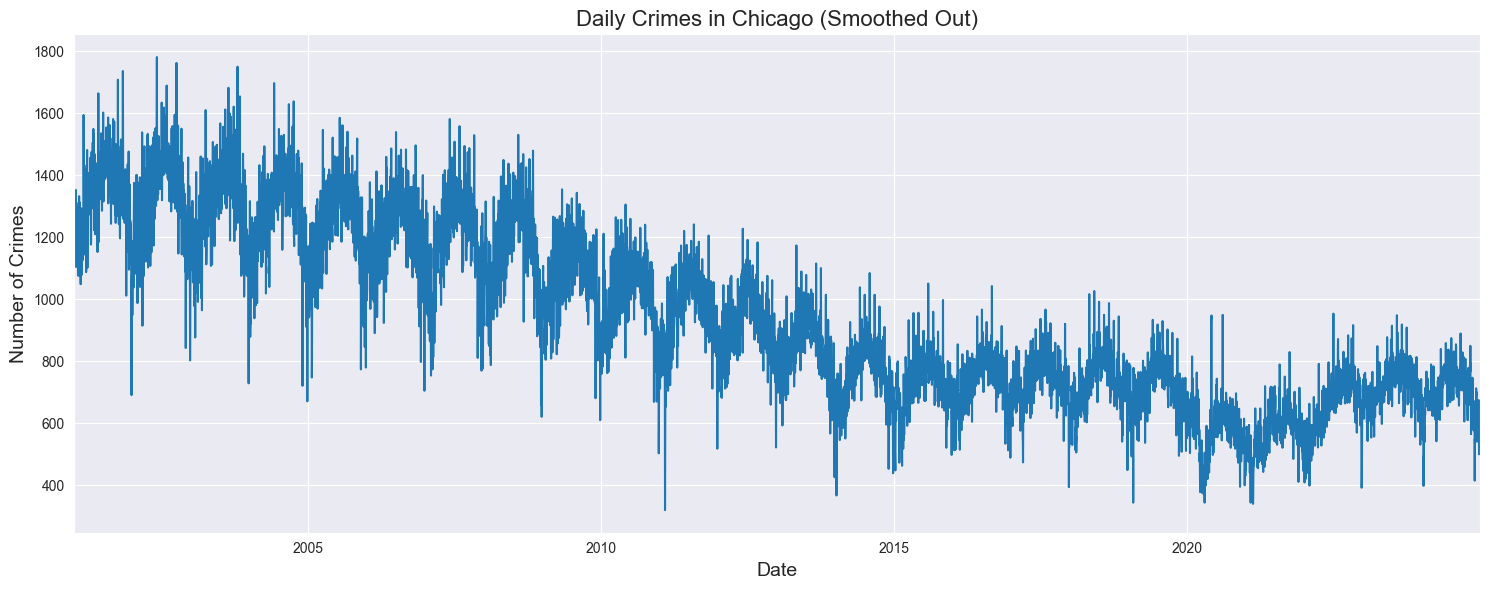

In [105]:
# Exclude the day with the spike
daily_crimes_excl = daily_crimes_excl[daily_crimes_excl.index != max_crimes_date]

# Plot the updated daily crimes time series
plt.figure(figsize=(15, 6))
daily_crimes_excl.plot()
plt.title('Daily Crimes in Chicago (Smoothed Out)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.tight_layout()
plt.show()

The plot looks so much better now. Lets apply time series decomposition to review trends, seasonality, and residuals.

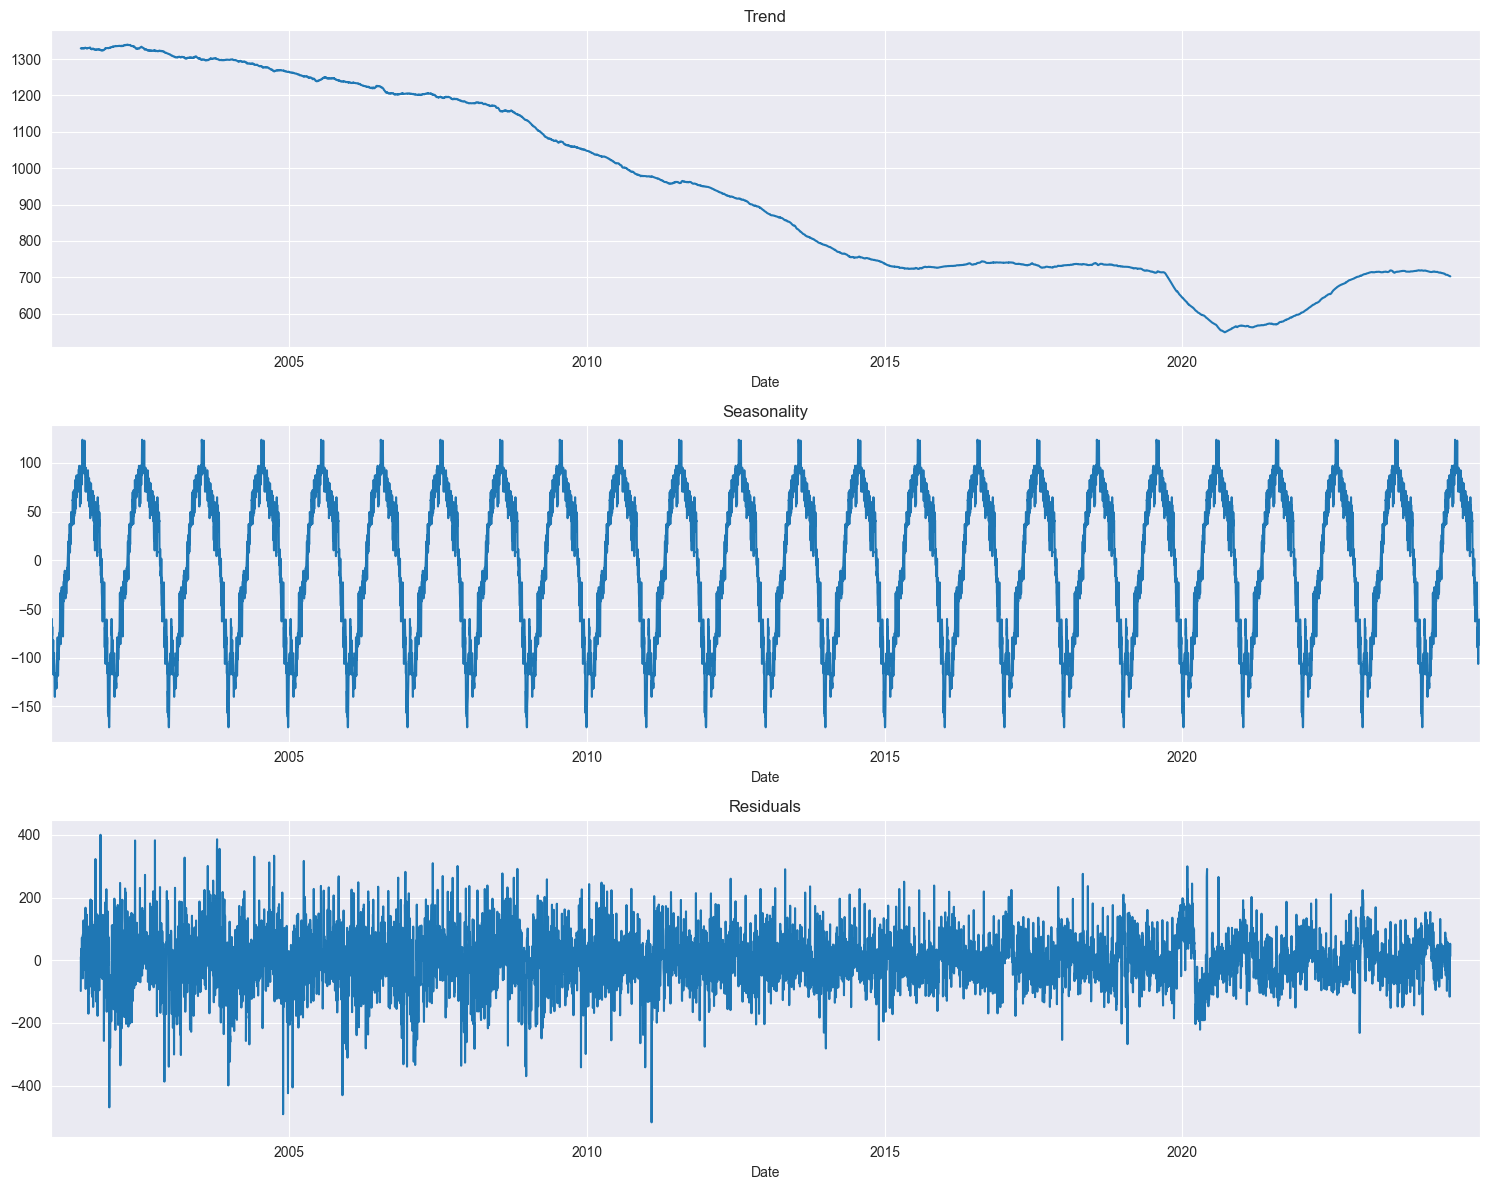

In [106]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(daily_crimes_excl, model='additive', period=365, )

# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

So it is confirmed from the plots that there is an overall decreasing trend in the number of crimes happening each year. And there is a seasonal rise near the middle of each year as it is summer then. Now let's make a dataset for crimes in 2024 only and see which month had the highest number of crimes.

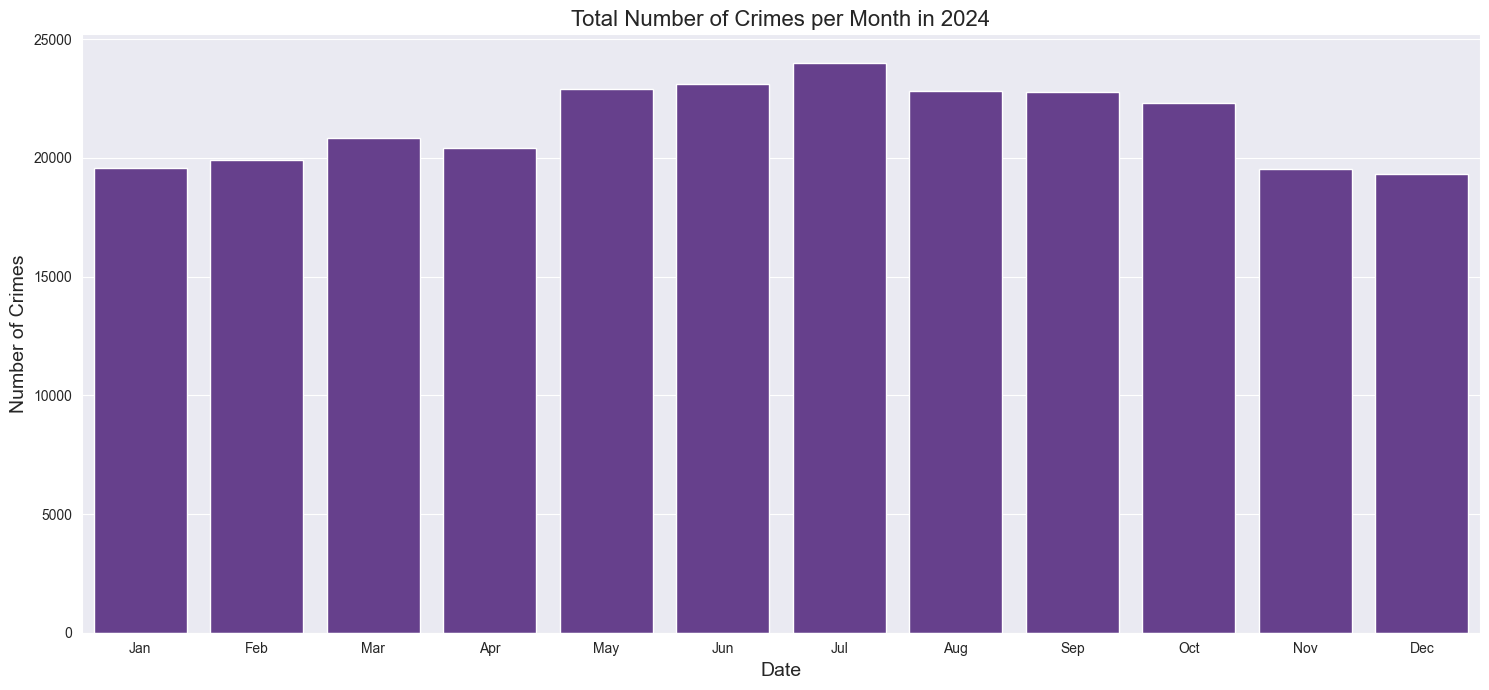

In [107]:
# Make a dataframe with crime data for 2024
cri_data_2024 = cri_data[((cri_data['Date'].dt.year == 2024))]

# Group by month to get the number of crimes per month in 2024
monthly_crimes = cri_data_2024.groupby(cri_data['Date'].dt.to_period("M")).size().reset_index()  
    
# Rename the columns       
monthly_crimes.columns = ['Month', 'Number of Crimes']
#Convert the month to abbreviated month name
monthly_crimes['Month'] = monthly_crimes['Month'].dt.strftime('%b')

# Plotting total number of crimes per year
plt.figure(figsize=(15, 7))
sns.barplot(data = monthly_crimes, x='Month', y='Number of Crimes',color = 'rebeccapurple')
plt.title('Total Number of Crimes per Month in 2024', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.tight_layout()
plt.show()

It is seen that the highest number of crimes was during the month of July which could have been predicted from our seasonal trend analysis. Now lets plot the average number of crimes in each hour of the day for 2024.

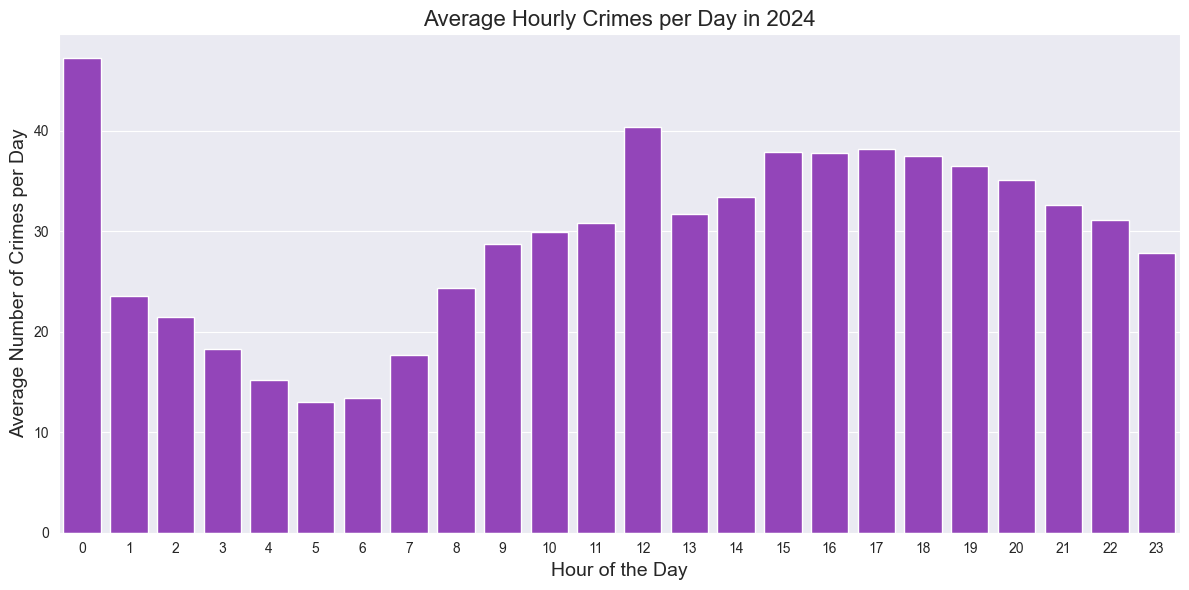

In [108]:
# Extract the date and hour from the Date column
cri_data_2024 = cri_data_2024.copy()
cri_data_2024['Hour'] = cri_data_2024['Date'].dt.hour
cri_data_2024['Only_Date'] = cri_data_2024['Date'].dt.date  # Keep only the date part

# Group by date and hour, count crimes
daily_hourly_crimes = cri_data_2024.groupby(['Only_Date', 'Hour']).size().reset_index(name='Crime_Count')

# Now, compute the average crime count per hour across all days
hourly_avg = daily_hourly_crimes.groupby('Hour')['Crime_Count'].mean().reset_index(name='Avg_Crimes_Per_Hour')

# Plot the average hourly crimes
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_avg, x='Hour', y='Avg_Crimes_Per_Hour', color='darkorchid')
plt.title('Average Hourly Crimes per Day in 2024', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Number of Crimes per Day', fontsize=14)
plt.tight_layout()
plt.show()

The plot tells us that crimes are lower at late hours of the night from 1 AM to 7 AM and then start rising during the day. There are two peaks at 12 AM and 12 PM which could again be due to some inputs when the time was not accurately recorded and crimes were assigned a time at 12AM or 12PM. We check if our assumption is correct.

In [109]:
# Extract the hour from the 'Date' column
cri_data_2024 = cri_data_2024.copy()
cri_data_2024['Time'] = cri_data_2024['Date'].dt.time
cri_data_2024['Time'] = cri_data_2024['Time'].astype(str)

# Filter the data for cases where the hour is 0 (12 AM) or 12 (12 PM)
cases_12am_exact = cri_data_2024[(cri_data_2024['Time'] == '00:00:00')]

# Filter the dataframe for crimes that happened at 12 AM
crimes_12am_2024 = cri_data_2024[cri_data_2024['Hour'] == 0]

# Get the total number of such crimes
total_crimes_12am_2024 = crimes_12am_2024.shape[0]

# Print the results
print(f"Number of crimes in 2024 where time was exactly 12 AM: {len(cases_12am_exact)}")
print(f"Total number of crimes in 2024 that happened in the first hour of the day : {total_crimes_12am_2024}")

Number of crimes in 2024 where time was exactly 12 AM: 8767
Total number of crimes in 2024 that happened in the first hour of the day : 17284


So, it is seen that more than half the crimes in first hour of the day happened exactly at 12AM and this is very unlikely. So, this is another fault in our data. Now We look at the Community Area dataset.

In [110]:
com_data.head()

the_geom  PERIMETER  AREA  \
0  MULTIPOLYGON (((-87.60914087617894 41.84469250...          0     0   
1  MULTIPOLYGON (((-87.59215283879394 41.81692934...          0     0   
2  MULTIPOLYGON (((-87.62879823733725 41.80189303...          0     0   
3  MULTIPOLYGON (((-87.6067081256125 41.816813770...          0     0   
4  MULTIPOLYGON (((-87.59215283879394 41.81692934...          0     0   

   COMAREA_  COMAREA_ID  AREA_NUMBE        COMMUNITY  AREA_NUM_1  \
0         0           0          35          DOUGLAS          35   
1         0           0          36          OAKLAND          36   
2         0           0          37      FULLER PARK          37   
3         0           0          38  GRAND BOULEVARD          38   
4         0           0          39          KENWOOD          39   

     SHAPE_AREA     SHAPE_LEN  
0  4.600462e+07  31027.054510  
1  1.691396e+07  19565.506153  
2  1.991670e+07  25339.089750  
3  4.849250e+07  28196.837157  
4  2.907174e+07  23325.167906

The important part in the dataset is the first column which has the MULTIPOLYGON data for the community areas. And there are the  'COMMUNITY' and 'AREA_NUMBE'(they forgot to put the 'R', I believe) columns which tells us which MULTIPOLYGON is for which area. I make the necessary changes to the data so that it can be read in geopandas.

In [111]:
#Convert the_geom column to a geometry object
com_data['the_geom'] = com_data['the_geom'].apply(wkt.loads)

#Create a GeoDataFrame
gdf = gpd.GeoDataFrame(com_data, geometry='the_geom', crs='epsg:4326')


I make a plot of the community areas to see that our geodata works.

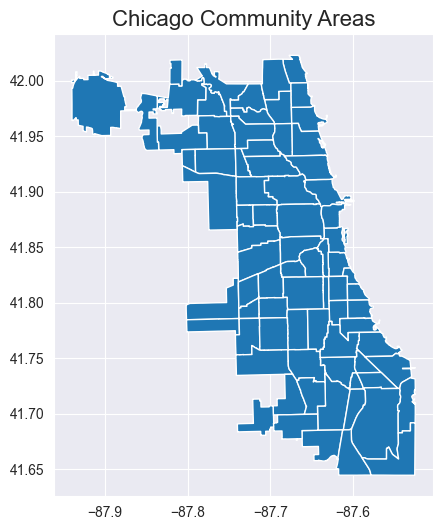

In [112]:
#Plot the GeoDataFrame
gdf.plot(figsize=(6, 6))
plt.title('Chicago Community Areas', fontsize=16)
plt.show()

I rename the columns and then sort the values by area number.

In [113]:
#Rename the column 'AREA_NUM_1' to 'Area Number'
gdf = gdf.rename(columns={'AREA_NUM_1': 'Area Number'})

#Convert the 'Area Number' column to integer
gdf['Area Number'] = gdf['Area Number'].astype(int)

#Sort the GeoDataFrame by ascending values of 'Area Number
gdf = gdf.sort_values(by='Area Number', ascending=True, ignore_index=True)

Let's keep only the columns that we need and then look at the first five rows.

In [114]:
# Select only the columns 'the_geom', 'COMMUNITY', and 'Area Number'
gdf_com = gdf[['the_geom', 'COMMUNITY','Area Number']]

gdf_com.head()

the_geom       COMMUNITY  \
0  MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...     ROGERS PARK   
1  MULTIPOLYGON (((-87.68465 42.01948, -87.68464 ...      WEST RIDGE   
2  MULTIPOLYGON (((-87.64102 41.9548, -87.644 41....          UPTOWN   
3  MULTIPOLYGON (((-87.67441 41.9761, -87.6744 41...  LINCOLN SQUARE   
4  MULTIPOLYGON (((-87.67336 41.93234, -87.67342 ...    NORTH CENTER   

   Area Number  
0            1  
1            2  
2            3  
3            4  
4            5

Lets's go back to our original crime data. During data inspection, it was seen that a lot of entries in 2001 and 2002 were missing community area, latitude and longitude values. So from now on, I work with the dataframe which has values from 2003 as we need the name of the community areas and the coordinates for the next steps.

In [115]:
#Modify the crimes dataframe to include years from 2003
cri_data = cri_data[((cri_data['Date'].dt.year >= 2003))]

We also do some data cleaning and then look at the types of crimes we have in our data set.

In [116]:
# Drop rows with missing values in the 'Community Area' column
cri_data = cri_data.dropna(subset=['Community Area'])
# Filter out rows where Community Area is 0.0
cri_data = cri_data[cri_data['Community Area'] != 0.0]

cri_data['Primary Type'].unique()

array(['OFFENSE INVOLVING CHILDREN', 'NARCOTICS', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'THEFT', 'BURGLARY', 'SEX OFFENSE', 'ROBBERY',
       'MOTOR VEHICLE THEFT', 'BATTERY', 'HOMICIDE',
       'CRIMINAL SEXUAL ASSAULT', 'OTHER OFFENSE', 'WEAPONS VIOLATION',
       'DECEPTIVE PRACTICE', 'STALKING', 'CRIMINAL TRESPASS', 'ASSAULT',
       'PROSTITUTION', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'HUMAN TRAFFICKING',
       'GAMBLING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

I form a new dataframe where the data is grouped by community area. And then I form individual data frames for specific types of crimes like homicides, theft, battery, narcotics, and prostitution. Let's merge all the data frames and then see what our new dataframe looks like.

In [117]:
#Group by Community Area to get the number of crimes per area
cri_area = cri_data.groupby(cri_data['Community Area']).size().reset_index(name='Total Crimes')

#Make dataframes homicides, theft, battery, narcotics and prostitution
homicides = cri_data[cri_data['Primary Type'] == 'HOMICIDE']
hom_area = homicides.groupby(homicides['Community Area']).size().reset_index(name='Homicides')
theft = cri_data[cri_data['Primary Type'] == 'THEFT']
thf_area = theft.groupby(theft['Community Area']).size().reset_index(name='Theft')
battery = cri_data[cri_data['Primary Type'] == 'BATTERY']
bat_area = battery.groupby(battery['Community Area']).size().reset_index(name='Battery')
narc = cri_data[cri_data['Primary Type'] == 'NARCOTICS']
narc_area = narc.groupby(narc['Community Area']).size().reset_index(name='Narcotics')
pros = cri_data[cri_data['Primary Type'] == 'PROSTITUTION']
pros_area = pros.groupby(pros['Community Area']).size().reset_index(name='Prostitution')

#Merge the dataframes
dff = pd.concat([gdf_com,cri_area,hom_area,thf_area,bat_area,narc_area,pros_area],axis =1).drop(columns=['Community Area'])

dff.head()

the_geom       COMMUNITY  \
0  MULTIPOLYGON (((-87.65456 41.99817, -87.65574 ...     ROGERS PARK   
1  MULTIPOLYGON (((-87.68465 42.01948, -87.68464 ...      WEST RIDGE   
2  MULTIPOLYGON (((-87.64102 41.9548, -87.644 41....          UPTOWN   
3  MULTIPOLYGON (((-87.67441 41.9761, -87.6744 41...  LINCOLN SQUARE   
4  MULTIPOLYGON (((-87.67336 41.93234, -87.67342 ...    NORTH CENTER   

   Area Number  Total Crimes  Homicides  Theft  Battery  Narcotics  \
0            1        112258        114  25670    20691       9174   
1            2         94391         71  23052    14957       4040   
2            3        106877         95  27195    18273      10174   
3            4         52286         18  14779     7877       1758   
4            5         42373         14  13549     4244       1386   

   Prostitution  
0         873.0  
1         134.0  
2         661.0  
3         192.0  
4         103.0

Let's make a bar plot in Seaborn, which shows the distribution of the total number of crimes by community area.

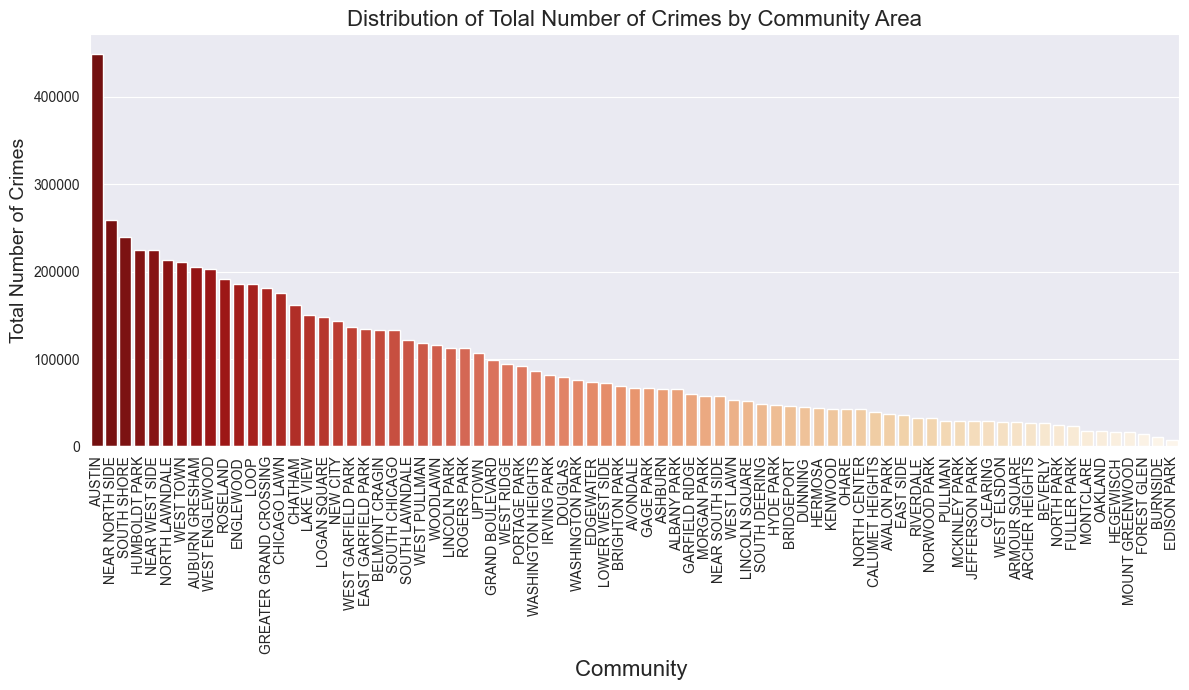

In [118]:
# Plotting the distribution of Total NUmber of Crimes by community
plt.figure(figsize=(12, 7))
sns.barplot(data=dff.sort_values(by='Total Crimes', ascending=False), x='COMMUNITY', y='Total Crimes', palette="OrRd_r", hue='COMMUNITY',  legend=False)
plt.title('Distribution of Tolal Number of Crimes by Community Area', fontsize=16)
plt.xlabel('Community ', fontsize=16)
plt.ylabel('Total Number of Crimes', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Using contextily, I can also make a map which shows the distribution of the crimes. It is seen that the most dangerous community area is Austin and the safest area is Edison Park when it comes to number of crimes reported in those areas.

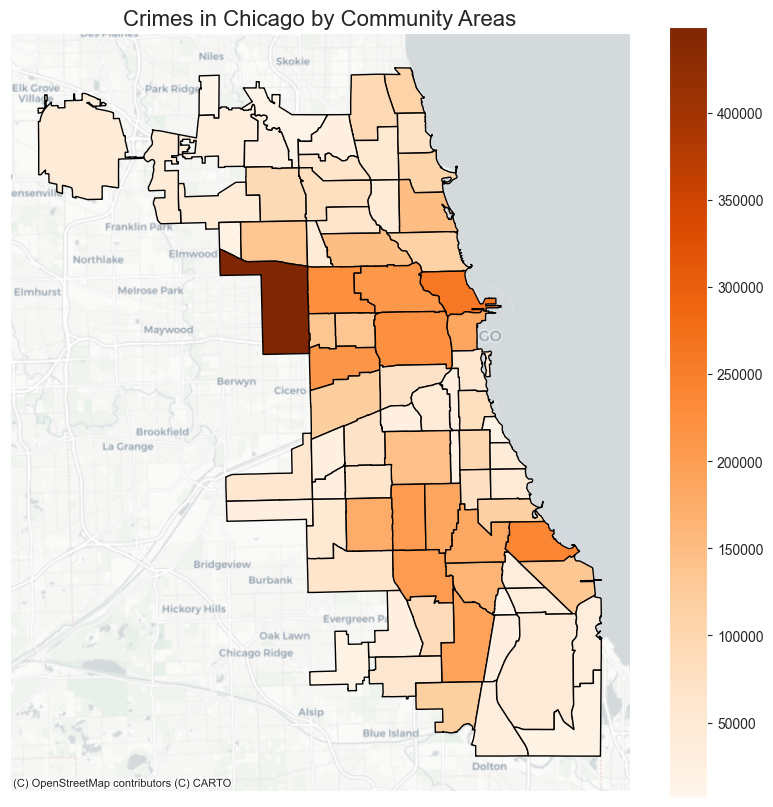

In [119]:
#Make a map of the crimes in Chicago by community areas
ax = dff.plot(column='Total Crimes', legend=True, cmap='Oranges', alpha=1, edgecolor='k', figsize=(10, 10))

plt.xticks([])
plt.yticks([])

ctx.add_basemap(ax, crs=dff.crs.to_string(), source="Cartodb Positron")

plt.title('Crimes in Chicago by Community Areas', fontsize=16)

# Save the plot to a png file
plt.savefig('crimes_in_chicago.png', format='png')

plt.show()

It is seen from the bar plot and the map that the number of crimes is higher in the western and the southern parts of Chicago
We can make barplots and maps for individual types of crimes. Let's start by making a bar plot and a map for the theft cases in Chicago.

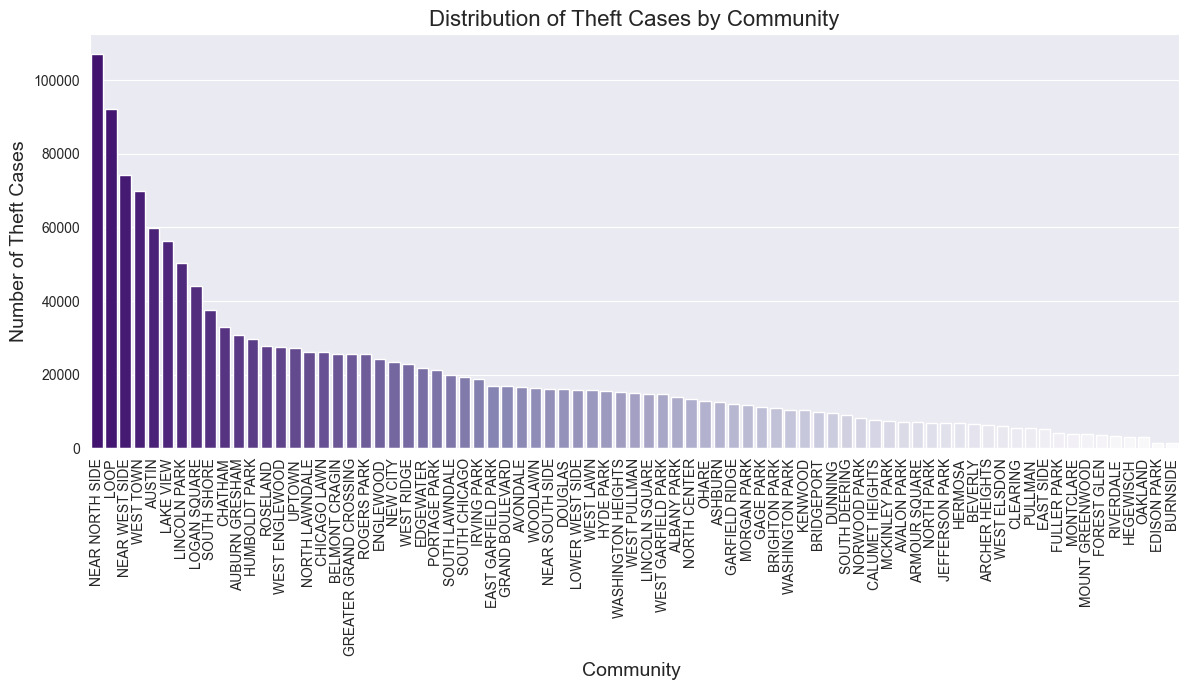

In [120]:
# Plotting the distribution of Theft Cases by community
plt.figure(figsize=(12, 7))
sns.barplot(data=dff.sort_values(by='Theft', ascending=False), x='COMMUNITY', y='Theft', palette="Purples_r", hue='COMMUNITY',  legend=False)
plt.title('Distribution of Theft Cases by Community', fontsize=16)
plt.xlabel('Community ', fontsize=14)
plt.ylabel('Number of Theft Cases', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This time it is seen that the highest number of theft cases is in the downtown area of Chicago. Now we look at the distribution of homicide cases in Chicago.

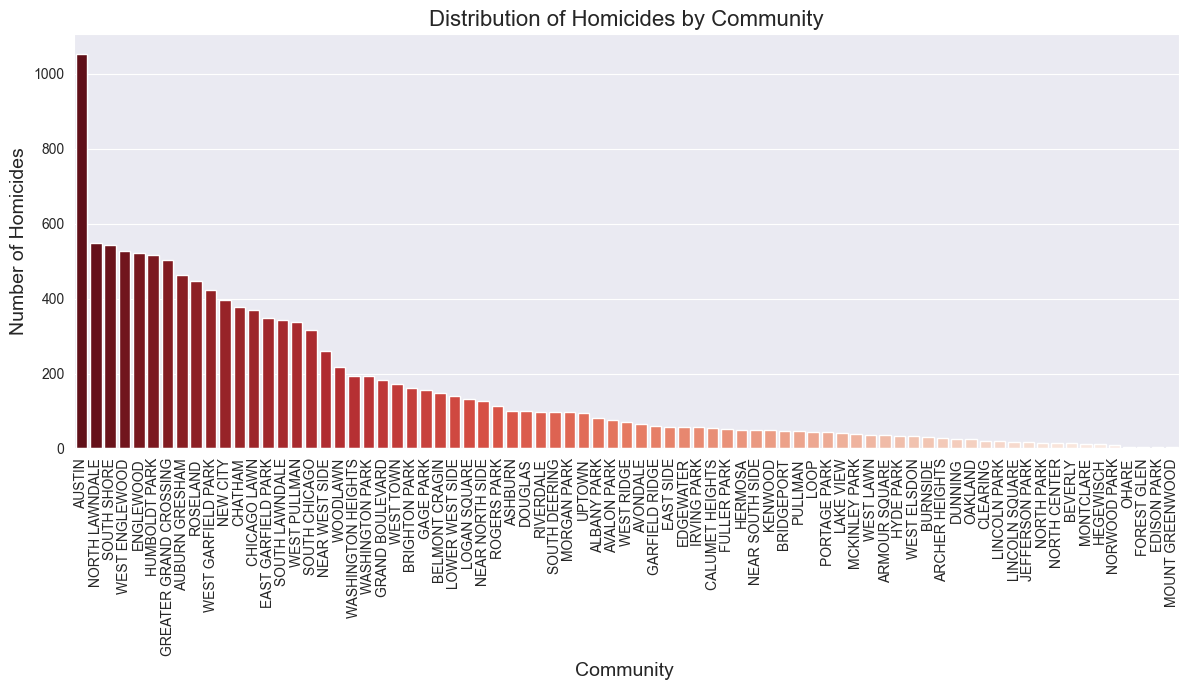

In [121]:
# Plotting the distribution of Homicides by community
plt.figure(figsize=(12, 7))
sns.barplot(data=dff.sort_values(by='Homicides', ascending=False), x='COMMUNITY', y='Homicides', palette="Reds_r", hue='COMMUNITY',  legend=False)
plt.title('Distribution of Homicides by Community', fontsize=16)
plt.xlabel('Community ', fontsize=14)
plt.ylabel('Number of Homicides', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It is seen that homicides are highest in the western and the southern parts of Chicago, particularly in Austin. Now I make a loop which makes maps for different types of crimes like thefts, homicides, narcotics, battery and prostituion.

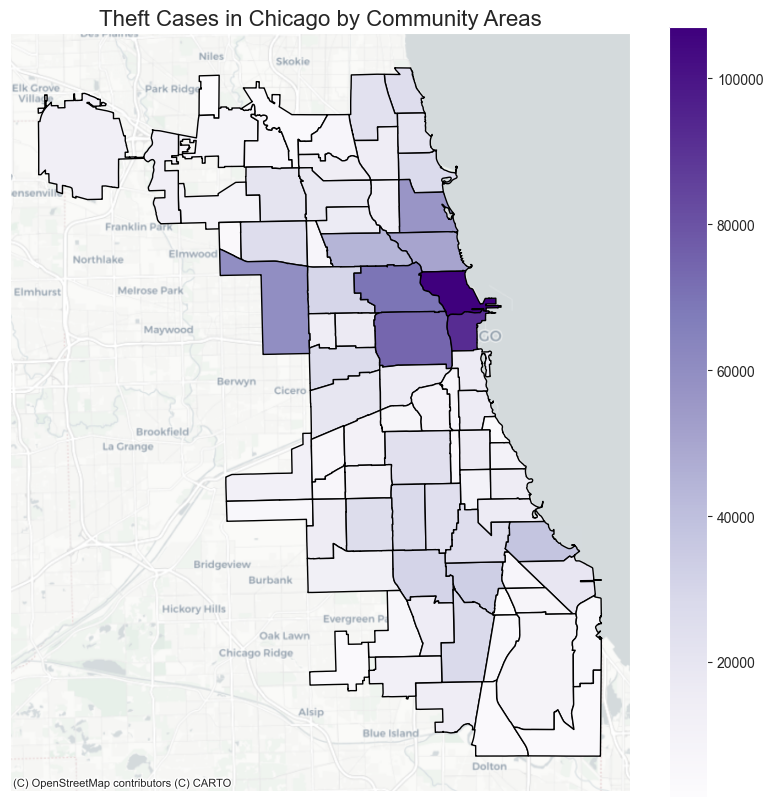

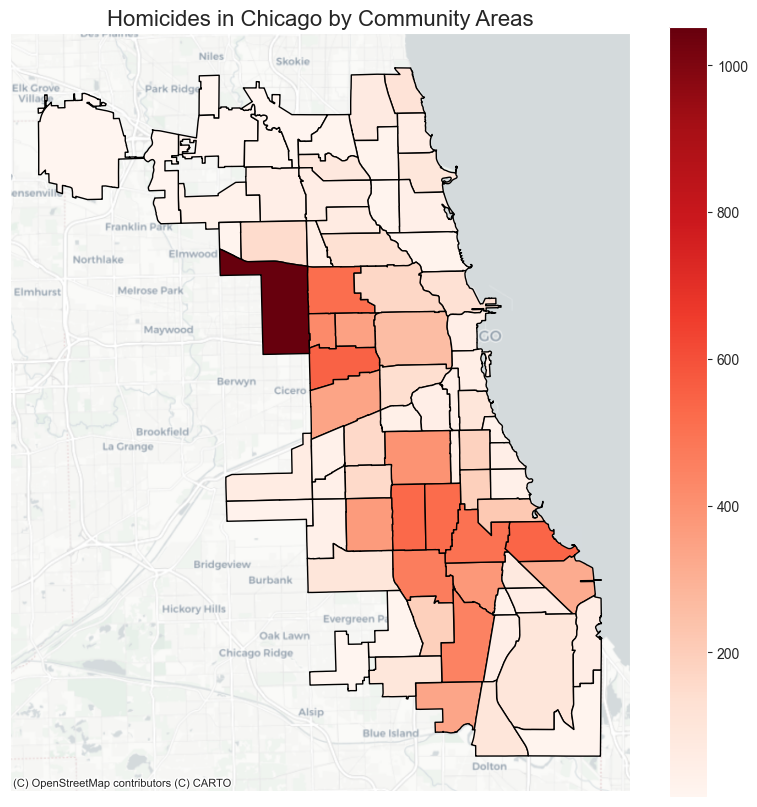

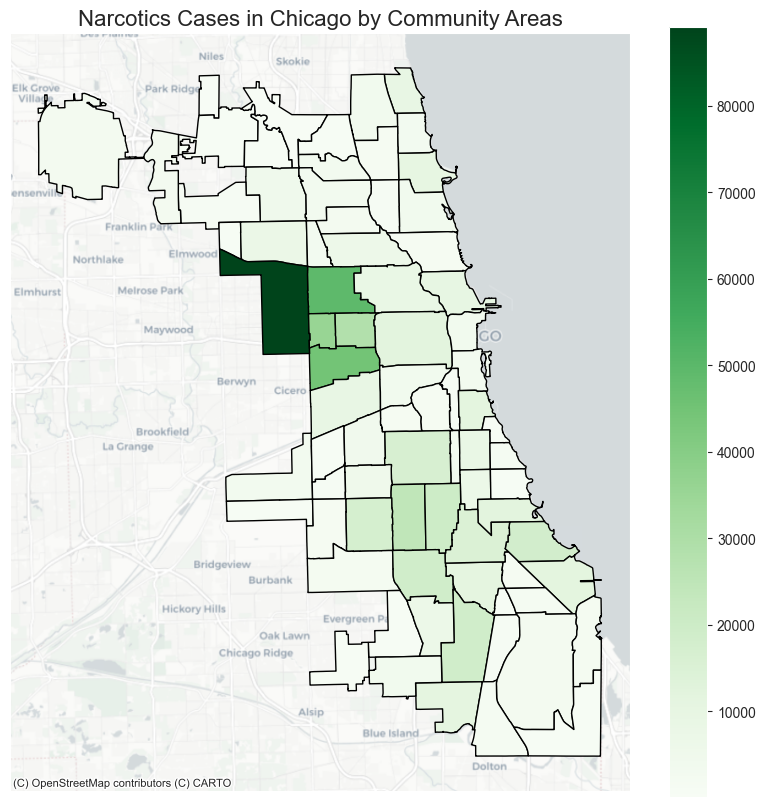

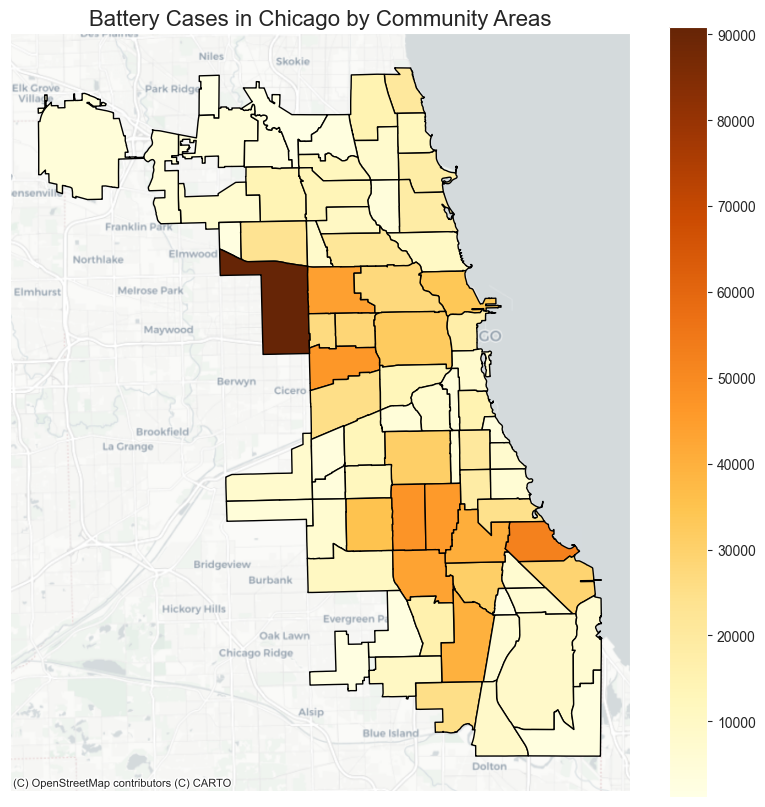

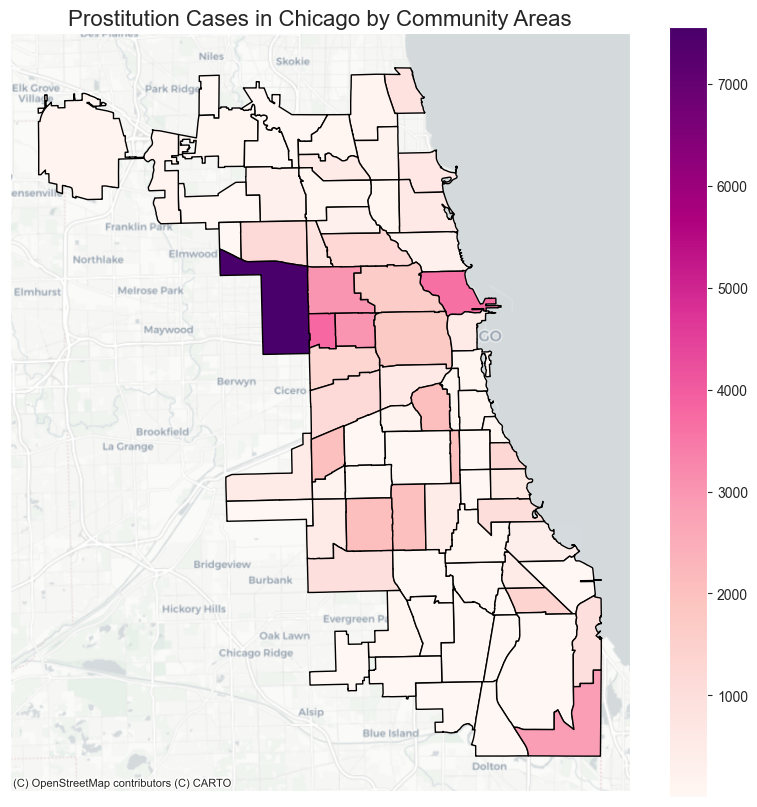

In [122]:
# List of columns to plot
columns_to_plot = ['Theft','Homicides','Narcotics', 'Battery', 'Prostitution']
colors = ['Purples','Reds','Greens', 'YlOrBr', 'RdPu']
titles = ['Theft Cases in Chicago by Community Areas',
          'Homicides in Chicago by Community Areas',
          'Narcotics Cases in Chicago by Community Areas', 
          'Battery Cases in Chicago by Community Areas', 
          'Prostitution Cases in Chicago by Community Areas']
file_names = ['theft_in_chicago.png',
              'homicides_in_chicago.png',
              'narcotics_in_chicago.png', 
              'battery_in_chicago.png', 
              'prostitution_in_chicago.png']

# Loop through by index
for i in range(len(columns_to_plot)):
    col = columns_to_plot[i]
    color = colors[i]
    title = titles[i]
    file_name = file_names[i]
    
    ax = dff.plot(column=col, legend=True, cmap=color, alpha=1, edgecolor='k', figsize=(10, 10))
    
    plt.xticks([])
    plt.yticks([])
    
    ctx.add_basemap(ax, crs=dff.crs.to_string(), source="CartoDB Positron")
    
    plt.title(title, fontsize=16)
    
    # plt.savefig(file_name, format='png')
    plt.show()

It is seen that in almost all the cases, Austin is the area with the highest number of crimes no matter what type. The only exception was theft, which happens more in the downtown area. Now let's make an interactive map using Folium, which shows the crime data when you click on the area.

In [123]:
#Make an interactive map of the crimes in Chicago by community areas

#Create a base map
m = folium.Map(location=[41.85, -87.7], tiles="Cartodb Positron", zoom_start=10, width=600, height=600)  # Centered around Chicago

# Add a choropleth layer to the map
folium.Choropleth(
    geo_data=gdf,
    data=dff,
    columns=["COMMUNITY", "Total Crimes"],
    key_on="feature.properties.COMMUNITY",
    fill_color='OrRd',
    legend_name="Total Number of Crimes",
    fill_opacity=1,
    line_opacity=0.2,
    smooth_factor=0,
    bins=9, 
).add_to(m)

# Add a tooltip to the map
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
Tip = folium.features.GeoJson(
    dff,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['COMMUNITY','Area Number','Total Crimes','Theft','Battery','Narcotics','Homicides','Prostitution'],
        aliases=['Community Area: ','Area Number','Total Crimes','Theft','Battery','Narcotics','Homicides','Prostitution'],
    )
)
m.add_child(Tip)
m.keep_in_front(Tip)

m

Lets now take a deeper dive into the most dangerous community area of Chicago which is Austin. I find the area number for Austin so that we can create a separate datafram for Austin from our original cri_data dataframe.

In [124]:
dff.loc[dff['COMMUNITY'] == 'AUSTIN']

the_geom COMMUNITY  Area Number  \
24  MULTIPOLYGON (((-87.78942 41.91751, -87.78927 ...    AUSTIN           25   

    Total Crimes  Homicides  Theft  Battery  Narcotics  Prostitution  
24        449073       1052  59800    90840      89086        7559.0

In [125]:
#Make a dtafram for Austin
Aus = cri_data[cri_data['Community Area'] == 25.0]

I make a barchart of the top 20 types of crimes in Austin and it is seen that homicide cases are there in the list.

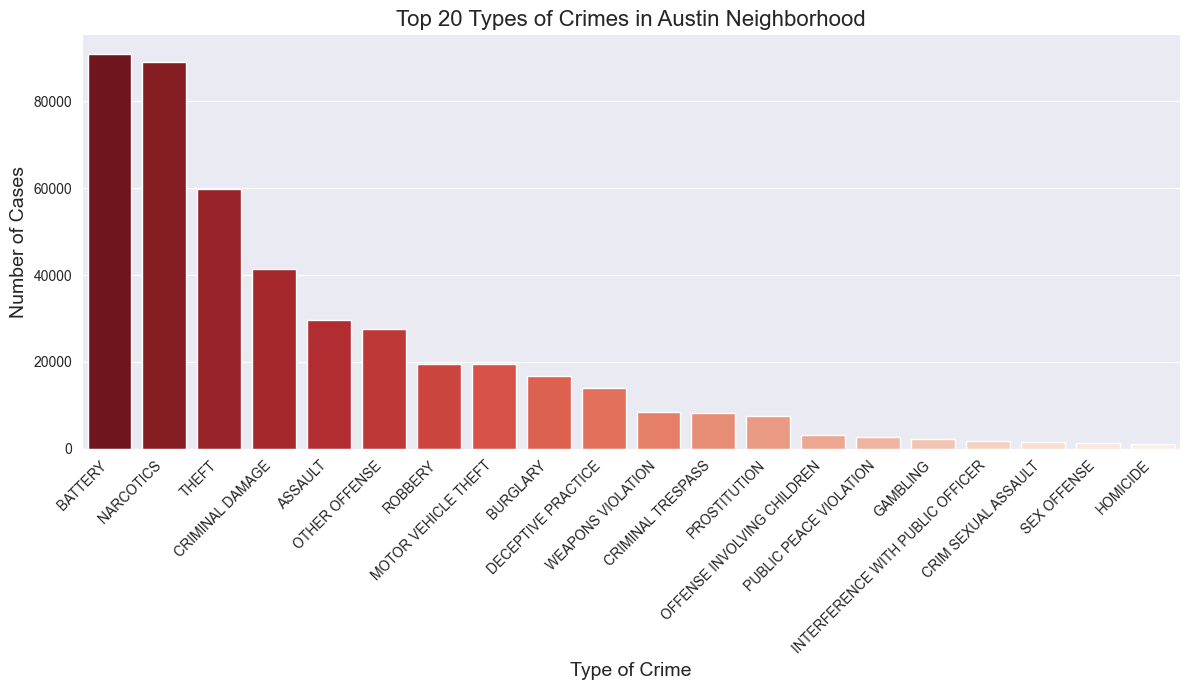

In [126]:
# Plot a Bar Chart
top_factors_aus = Aus['Primary Type'].value_counts().head(20)

plt.figure(figsize=(12, 7))

sns.barplot(x=top_factors_aus.index, y=top_factors_aus.values, hue= top_factors_aus.index, palette="Reds_r", legend=False)
plt.title('Top 20 Types of Crimes in Austin Neighborhood', fontsize=16)
plt.xlabel('Type of Crime', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I can check how many arrests were made for crimes which took place in Austin.

In [127]:
# Group by year and count the number of arrests
aust_arr_per_year = Aus.groupby([Aus['Date'].dt.year, 'Arrest']).size().unstack().reset_index()

# Rename the columns
aust_arr_per_year.columns = ['Year', 'No Arrests', 'Arrests']

aust_arr_per_year.head()

Year  No Arrests  Arrests
0  2003       17342    13498
1  2004       16911    12580
2  2005       15974    12405
3  2006       15932    12966
4  2007       15808    12736

By making a stacked barplot with arrests and no arrests cases, it is seen that there has been a downward trend in number of arrests made compared to the total number of crimes.

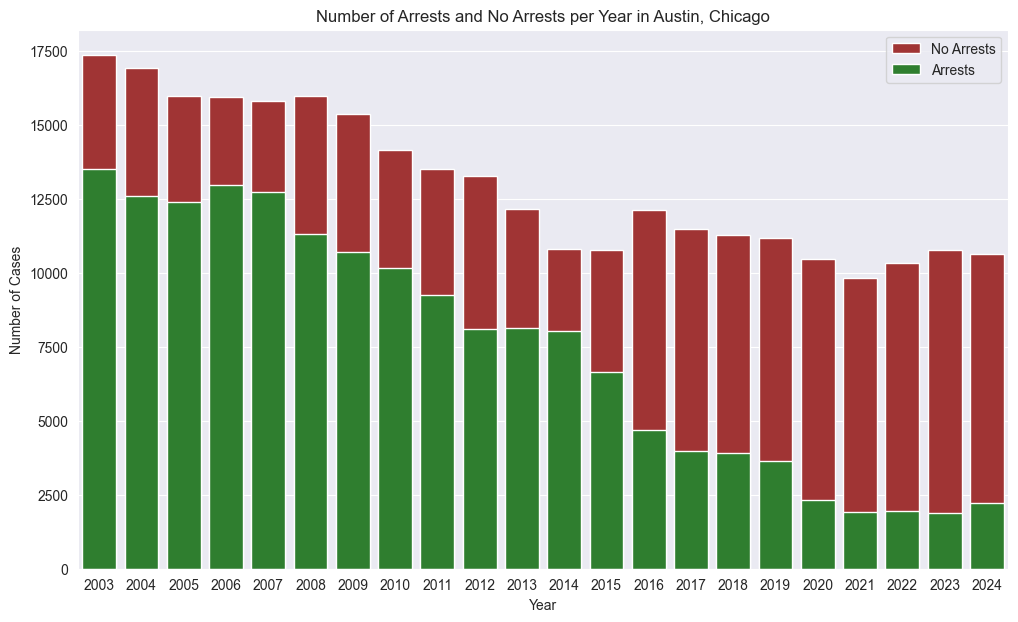

In [128]:
# Plot the data
plt.figure(figsize=(12, 7))

# Plot the 'No Arrests' bar
sns.barplot(data=aust_arr_per_year, x='Year', y='No Arrests', color='firebrick', label='No Arrests')

# Plot the 'Arrests' bar 
sns.barplot(data=aust_arr_per_year, x='Year', y='Arrests', color='forestgreen', label='Arrests')

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Number of Arrests and No Arrests per Year in Austin, Chicago')
plt.legend()
plt.show()

Lets look at the number of homicide cases in Asutin per year.

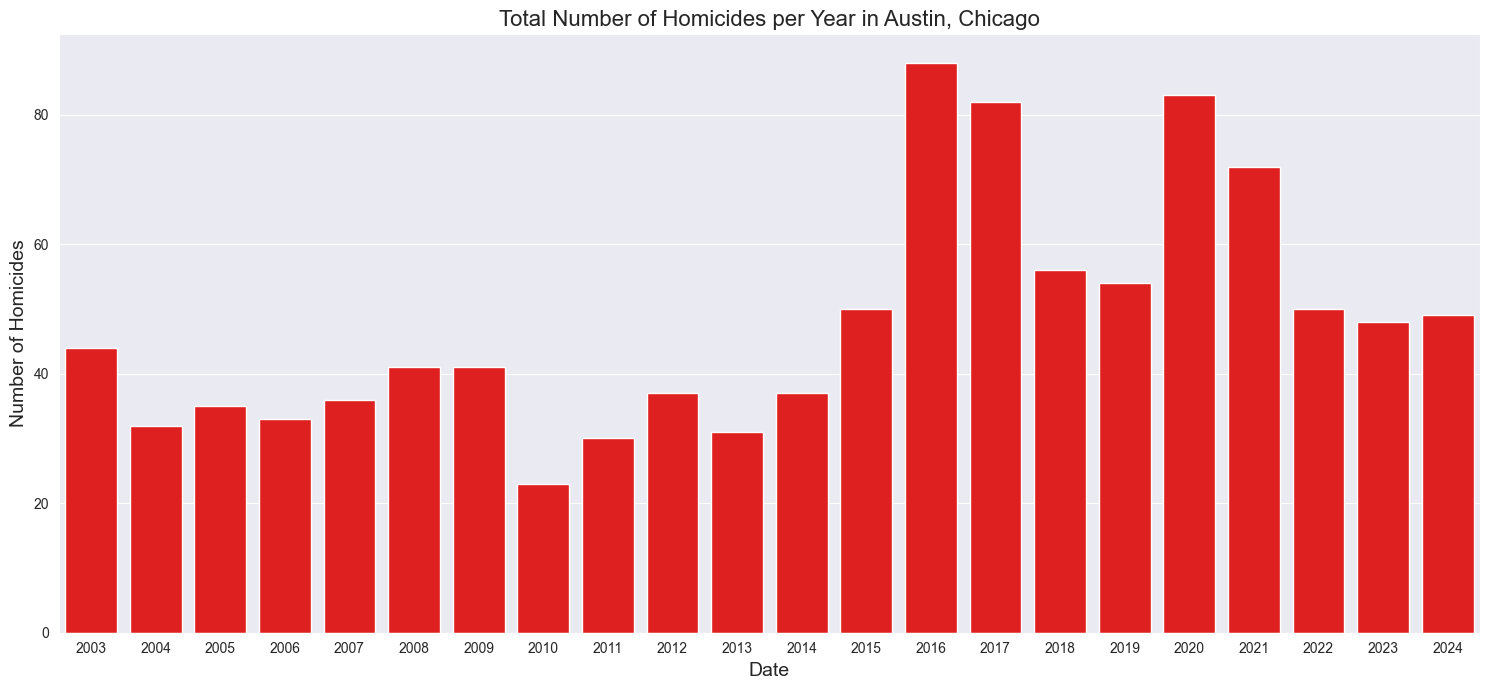

In [129]:
#Make a datafram with only Homicides in Austin
hom_aus = Aus[Aus['Primary Type'] == 'HOMICIDE']

#Group by year to get the number of crimes per year
yearly_crimes_hom_aus = hom_aus.groupby(hom_aus['Date'].dt.to_period("Y")).size().reset_index()  
    
#Rename the columns       
yearly_crimes_hom_aus.columns = ['Year', 'Number of Crimes']

#Plotting total number of crimes per year
plt.figure(figsize=(15, 7))
sns.barplot(data=yearly_crimes_hom_aus, x='Year', y='Number of Crimes', color='red')
plt.title('Total Number of Homicides per Year in Austin, Chicago', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Homicides', fontsize=14)
plt.tight_layout()
plt.show()

It's alarming to see that the number of homicides were higher in 2020 (during pandemic times) although the total number of crimes was lower as seen in previous plots. And the number of homicides is not following a downward trend like the total number of crimes. Now let's take a look at the number of homicide cases in all of Chicago.

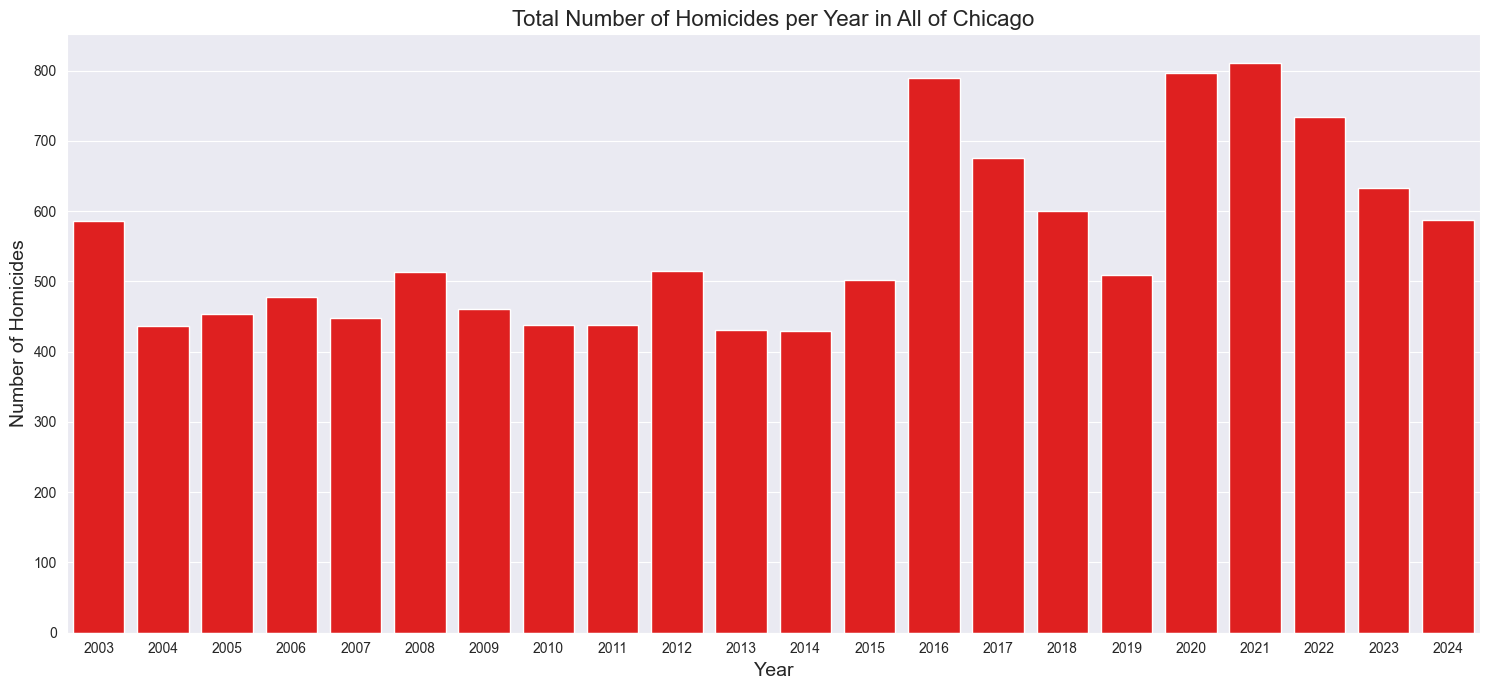

In [130]:
# Group by year to get the number of homicides per year
yearly_homicides = homicides.groupby(homicides['Date'].dt.to_period("Y")).size().reset_index()

# Rename the columns
yearly_homicides.columns = ['Year', 'Number of Homicides']

# Plotting total number of homicides per year
plt.figure(figsize=(15, 7))
sns.barplot(data=yearly_homicides, x='Year', y='Number of Homicides', color='r')
plt.title('Total Number of Homicides per Year in All of Chicago', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Homicides', fontsize=14)
plt.tight_layout()
plt.show()

We see the same alarming trends again! Now I take a look at the number of crimes taking place per month in 2024. in the downtown area of Chicago which comprises of community areas called 'Loop' and 'Near North Side'. The area numbers are 8 and 32 respectively for these community areas.

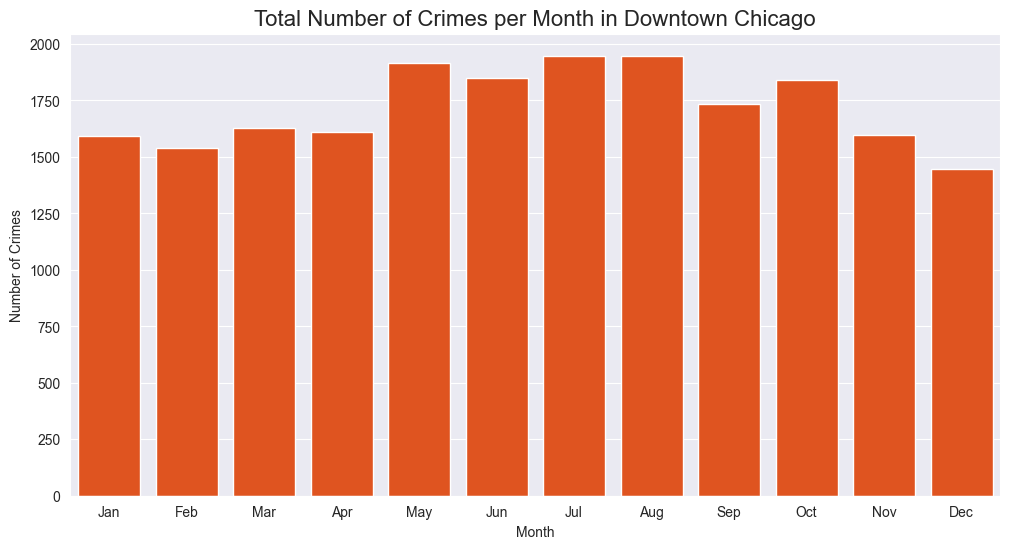

In [131]:
#Create a dataframe for crimes in downtown Chicago which comprises of community areas 32 and 8
downtown = cri_data[cri_data['Community Area'].isin([32.0, 8.0]) & (cri_data['Date'].dt.year == 2024)]

# Group by month to get the number of crimes per month
downtown = downtown.copy() # Create a copy of the dataframe

# Add columns with month and sort by month number
downtown['Month Number'] = downtown['Date'].dt.strftime('%m')
downtown['Month'] = downtown['Date'].dt.strftime('%b')
downtown.sort_values(by='Month Number', inplace=True)

#Group byyear to get the number of crimes per year
monthly_crimes_d = downtown.groupby(downtown['Date'].dt.to_period("M")).size().reset_index()  
    
#Rename the columns       
monthly_crimes_d.columns = ['Month', 'Number of Crimes']
monthly_crimes_d['Month'] = monthly_crimes_d['Month'].dt.strftime('%b')

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_crimes_d, x='Month', y='Number of Crimes', color = 'orangered')
plt.title('Total Number of Crimes per Month in Downtown Chicago', fontsize=16)
plt.show()


We see again that the warmer months see more crimes. Now, let's make a heatmap with time using folium which shows the location of each crime which took place in the downtown area in each month of 2024.

In [132]:
from folium.plugins import HeatMapWithTime

# Group by Month and create data format required by HeatMapWithTime
heat_data = []
for month in downtown['Month'].unique():
    monthly_data = downtown[downtown['Month'] == month][['Latitude', 'Longitude']].dropna() #drop nan values
    heat_data.append(monthly_data.values.tolist())

# Create the folium map
m = folium.Map(location=[downtown['Latitude'].mean(), downtown['Longitude'].mean()],tiles="Cartodb Positron", zoom_start=13, width=600, height=600)


# Add HeatMapWithTime
HeatMapWithTime(
    heat_data,
    index=downtown['Month'].unique().tolist(), 
    auto_play=True,
    max_opacity=0.7,
    radius=7,
).add_to(m)

# Save or display the map
#m.save('heatmap_with_time.html')

m

Lastly, I make a heatmap with time for weapons violation and homicide cases in the downtwon area.

In [133]:
downtown2 = downtown[downtown['Primary Type'].isin(['HOMICIDE','WEAPONS VIOLATION'])]

# Group by Month and create data format required by HeatMapWithTime
heat_data = []
for month in downtown2['Month'].unique():
    monthly_data = downtown2[downtown2['Month'] == month][['Latitude', 'Longitude']].dropna()
    heat_data.append(monthly_data.values.tolist())

# Create the folium map
m2 = folium.Map(location=[downtown2['Latitude'].mean(), downtown2['Longitude'].mean()],tiles="Cartodb Positron", zoom_start=13, width=600, height=600)


# Add HeatMapWithTime
HeatMapWithTime(
    heat_data,
    index=downtown2['Month'].unique().tolist(), 
    auto_play=True,
    max_opacity=0.7,
    radius=7,
).add_to(m2)

# Save or display the map
#m2.save('heatmap_with_time.html')

m2